<a href="https://colab.research.google.com/github/Mbaugh447/Mbaugh447.github.io/blob/main/Final_Project_Baugh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before I go into my process I want to talk about what my program does and why it does it.  Fantasy football is a game in which people draft American football players who score fantasy points each game.  These people then compete with each other inside of a league in which they draft to eventually win the superbowl in a similar structure to that of the actual NFL season.  Every year there is a debate on which high scoring position you should draft first, WR or RB this program settles that debate.


---



The process of creating this project started off with me searching for a website that I could scrape.  To do this I had to find a website that not only wasn’t locked behind an API but was organized enough for me to effectively access specific data.  fantasy.nfl.com matched these requirements so I started scraping it to gain access to a specific column of data, the overall points.  To do this took some trial and error but I was eventually able to do it by printing out each cell in the table then counting how many cells down the column that I wanted access to, the answer was 16.  Using this fact I was able to print out total points for both RB’s and WR’s.  This whole process took up a majority of my time completing this process because I had never web scraped before, this tool is going to be essential to my projects going forward and I am glad I was able to learn it even if I had to bang my head up against the wall.

In [1]:
from bs4 import BeautifulSoup
import requests
import statistics
url_WR = 'https://fantasy.nfl.com/research/scoringleaders?position=3&statCategory=stats&statSeason=2023&statType=seasonStats&statWeek=1'
url_RB = 'https://fantasy.nfl.com/research/scoringleaders?position=2&sort=pts&statCategory=stats&statSeason=2023&statType=seasonStats'

def scrape_points_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    table = soup.find('table')
    if table:
        rows = table.find_all('tr')
        points_data = []

        for row in rows:
            cells = row.find_all('td')
            if len(cells) >= 16:
                points = cells[15].get_text(strip=True)
                points_data.append(points)

        return points_data
    else:
        print("No table found on the page.")
        return []


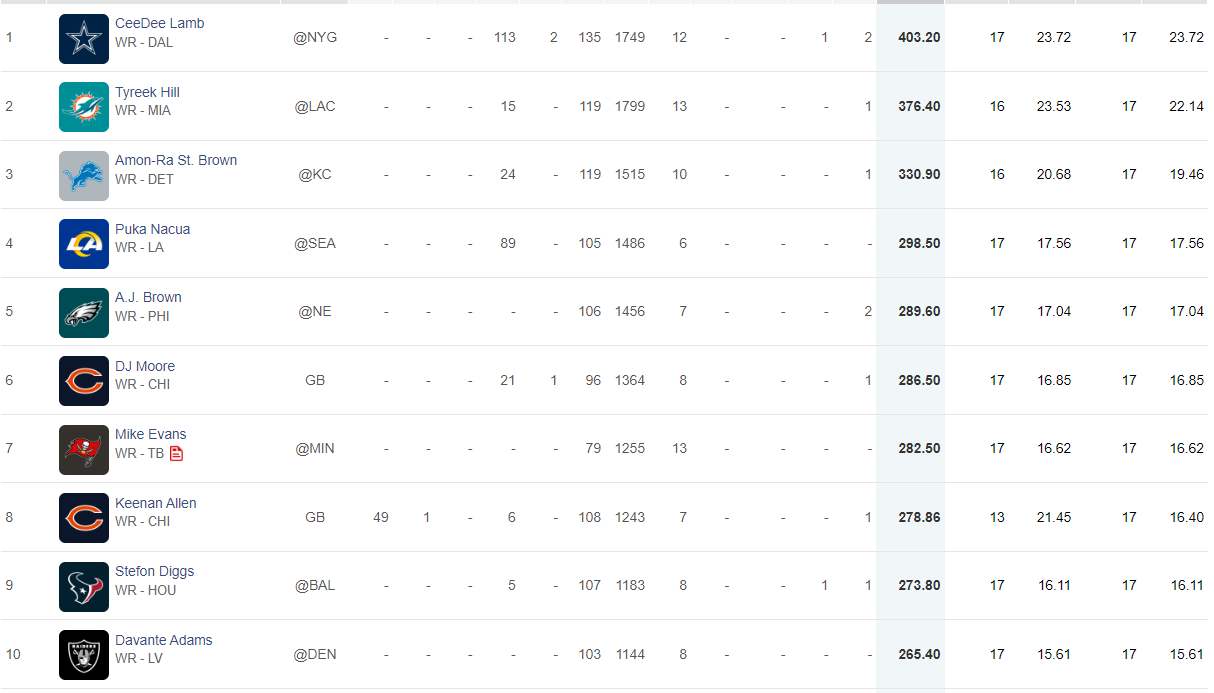

Above is one of the tables that I had to search through in order to scrape just the highlighted column.

In [2]:
def find_mean(data):
    if len(data) > 0:
        return sum(data) / len(data)
    else:
        return None

def find_median(data):
  median_value = statistics.median(data)
  return(median_value)

def top_average_deviation(data):
  return data[0]-find_mean(data)

def compare_and_assign_points(wr_stat, rb_stat, points):
    if wr_stat > rb_stat:
        return "WR", points
    elif rb_stat > wr_stat:
        return "RB", points
    else:
        return "Tie", 0
points_data_WR = scrape_points_data(url_WR)
points_data_RB = scrape_points_data(url_RB)



After I finished gathering the data I could finally move on to organizing it and using it to come to conclusions.  To first organize the data I created two lists and I appended the data to each list while also converting the strings to floats so I could use them for calculations later on.  With this data neatly organized in lists I created functions that would find the mean, median, and the top players points minus the mean.  I did this so that I could have data points to compare.  The reason I included top players minus the mean is because in Fantasy football depending on league size, you aren't going to go up against an opponent with a wr scoring 0 points, they most likely are going to score the mean so comparing the top choice to that mean is more effective than not.  This process of using logic to determine what factors I should use to determine which position should be a first round pick really made me think deep into the logic of fantasy which was very interesting.

In [3]:
listWR = []
listRB = []
for points in points_data_WR:
    try:
        listWR.append(float(points))
    except ValueError:
        pass

for points in points_data_RB:
    try:
        listRB.append(float(points))
    except ValueError:
        pass
wrmedian = find_median(listWR)
rbmedian = find_median(listRB)
wrmean = find_mean(listWR)
rbmean = find_mean(listRB)
topminusWR = top_average_deviation(listWR)
topminusRB = top_average_deviation(listRB)
topPlayerWR = listWR[0]
topPlayerRB = listRB[0]
print("WR Points Data:")
print("Median: "+str(wrmedian))
print("Mean: "+str(wrmean))
print("Top minus the average: "+str(topminusWR))
print("Top player: "+str(topPlayerWR))
print("\nRB Points Data:")
print("Median: "+str(rbmedian))
print("Mean: "+str(rbmean))
print("Top minus the average: "+str(topminusRB))
print("Top player: "+str(topPlayerRB))



WR Points Data:
Median: 250.2
Mean: 264.1904
Top minus the average: 139.00959999999998
Top player: 403.2

RB Points Data:
Median: 223.2
Mean: 234.74239999999998
Top minus the average: 156.55760000000004
Top player: 391.3


To end off this program I assigned point values to each metric of data based on values that I have derived from researching the different data measures and fantasy football itself.  Then I created a function that decides which position won each category by comparing number size.  WIth this function I was able to sort through each category and assign a winner and then award points for the category.  This algorithm is printed at the end where it tells you to make the decision based on who got the most points from each category combined.  My biggest takeaway from this project is that it is a requirement to fail in coding, that is how I was able to make progress.  With each failure and subsequent troubleshooting I learned more and more until I was finally able to complete the project.

In [4]:
wr_points = 0
rb_points = 0

stat_comparisons = [
    (wrmean, rbmean, 4, "Mean"),
    (wrmedian, rbmedian, 5, "Median"),
    (topminusWR, topminusRB, 10, "Deviation"),
    (topPlayerWR, topPlayerRB, 7, "Top Player")
]
print("\nAlgorithim Points: ")
for wr_stat, rb_stat, points, stat_name in stat_comparisons:
    winner, assigned_points = compare_and_assign_points(wr_stat, rb_stat, points)
    if winner == "WR":
        wr_points += assigned_points
    elif winner == "RB":
        rb_points += assigned_points
    print(stat_name, "Comparison:", winner, "gets", assigned_points, "points")

print("\nFinal Scores:")
print("WR Points:",wr_points)
print("RB Points:",rb_points)
print("You should pick a", winner, "first round")


Algorithim Points: 
Mean Comparison: WR gets 4 points
Median Comparison: WR gets 5 points
Deviation Comparison: RB gets 10 points
Top Player Comparison: WR gets 7 points

Final Scores:
WR Points: 16
RB Points: 10
You should pick a WR first round
